In [369]:
import pandas as pd
import numpy as np
import cvxpy as cp

## SVM 

In [370]:
df = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/svm_2d_dataset.csv')
df.head()

,Feature1,Feature2,Label
0,1.728312,-1.257178,0
1,1.198409,-1.880295,0
2,3.048817,3.002258,1
3,1.073579,-1.852979,0
4,1.085900,-1.837457,0


In [371]:
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [372]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_train[y_train == 0] = -1  # Convert labels to -1 for SVM
y_test = y_test.to_numpy()
y_test[y_test == 0] = -1  # Convert labels to -1 for SVM

In [373]:
def solve_svm_hard_margin(X_train, y_train):
    n_samples, n_features = X_train.shape

    # Define optimization variables
    w = cp.Variable(n_features)
    b = cp.Variable()

    # Define the constraints: y_i * (w^T x_i + b) >= 1
    constraints = [y_train[i] * (w.T @ X_train[i] + b) >= 1 for i in range(n_samples)]

    # Objective: minimize the Euclidean norm of w (margin maximization)
    objective = cp.Minimize(cp.norm(w, 2))

    # Define and solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    return w.value, b.value

In [374]:
w, b = solve_svm_hard_margin(X_train, y_train)

In [375]:
preds = np.sign(X_test @ w + b)


In [376]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Weights: [-0.62810075  0.74710484]
Bias: 0.9617394533305291


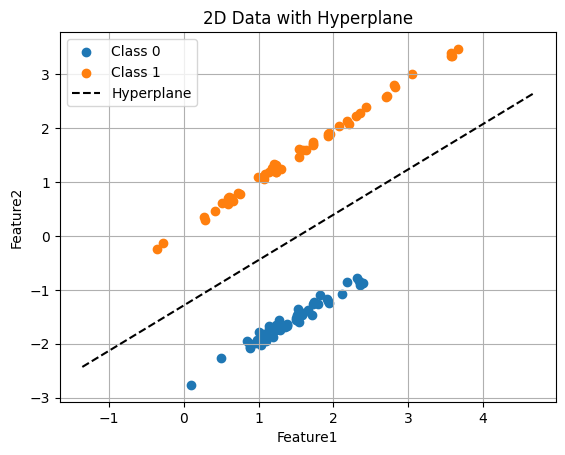

In [377]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called df
# And it has columns: 'feature1', 'feature2', 'label'
feature1 = df.columns[0]  # First feature
feature2 = df.columns[1]  # Second feature

# Extract features and labels
X = df[[feature1, feature2]].values
y = df["Label"].values

# Hyperplane parameters

print("Weights:", w)
print("Bias:", b)
# Range of x1 values for plotting the hyperplane
x1_vals = np.linspace(df[feature1].min() - 1, df[feature1].max() + 1, 100)
# Compute corresponding x2 values using the hyperplane equation
x2_vals = -(w[0]*x1_vals + b) / w[1]

# Plot the data points by label
for label in df['Label'].unique():
    subset = df[df['Label'] == label]
    plt.scatter(subset[feature1], subset[feature2], label=f"Class {label}")

# Plot the hyperplane
plt.plot(x1_vals, x2_vals, 'k--', label='Hyperplane')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2D Data with Hyperplane")
plt.legend()
plt.grid(True)
plt.show()

## SVM with soft constraints

In [378]:
df = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/more_noisy_svm_dataset.csv')
df.head()

,Feature1,Feature2,Label
0,2.102258,2.148817,1
1,-0.276214,1.012767,-1
2,-0.910385,0.156563,-1
3,1.675149,1.809383,1
4,0.574777,0.645987,1


In [379]:
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [380]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train[y_train == 0] = -1  # Convert labels to -1 for SVM
y_test[y_test == 0] = -1  # Convert labels to -

In [381]:
def gradient_descent_svm(X, y, C, learning_rate=0.01, max_iter=500):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0

    for _ in range(max_iter):
        grad_w = np.zeros(n_features)
        grad_b = 0.0

        for i in range(n_samples):
            if y[i] * (np.dot(w, X[i]) + b) < 1:
                grad_w += -C * y[i] * X[i]
                grad_b += -C * y[i]

        grad_w += w  # L2 regularization gradient

        # Update parameters
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

    return w, b

In [382]:
w, b = gradient_descent_svm(X_train, y_train, 1, learning_rate=0.001, max_iter=1000)

In [383]:
w, b

(array([ 1.86998934, -1.69619814]), 0.9660000000000009)

In [384]:
preds = np.sign(X_test @ w + b)

In [385]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.00%


In [386]:
C = np.arange(0, 1, 0.05)
C

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [387]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_boundary(X_train, y_train, w, b, c):
    plt.figure(figsize=(8, 6))

    # Scatter plot of data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k', label='Data Points')

    # Get current plot bounds
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)

    # Decision boundary: w.x + b = 0 → x2 = -(w1*x1 + b)/w2
    yy = -(w[0] * xx + b) / w[1]

    # Margins: w.x + b = ±1 → parallel lines
    yy_down = -(w[0] * xx + b - 1) / w[1]
    yy_up   = -(w[0] * xx + b + 1) / w[1]

    # Plot decision boundary and margins
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
    plt.plot(xx, yy_down, 'k--', label='Margins')
    plt.plot(xx, yy_up, 'k--')

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary with Margins for C = {c}')
    plt.legend()
    plt.grid(True)
    plt.show()


Weights: [0. 0.], Bias: 0.0
C=0.0, Accuracy: 0.00%


/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_35711/3957908958.py:17: RuntimeWarning: invalid value encountered in divide
  yy = -(w[0] * xx + b) / w[1]
/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_35711/3957908958.py:20: RuntimeWarning: divide by zero encountered in divide
  yy_down = -(w[0] * xx + b - 1) / w[1]
/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_35711/3957908958.py:21: RuntimeWarning: divide by zero encountered in divide
  yy_up   = -(w[0] * xx + b + 1) / w[1]


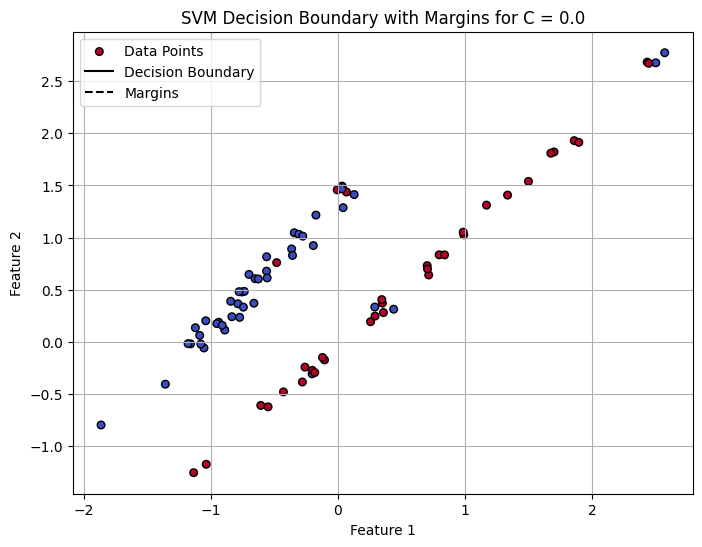

Weights: [ 1.00752083 -0.4851073 ], Bias: 0.01849999999999978
C=0.05, Accuracy: 75.00%


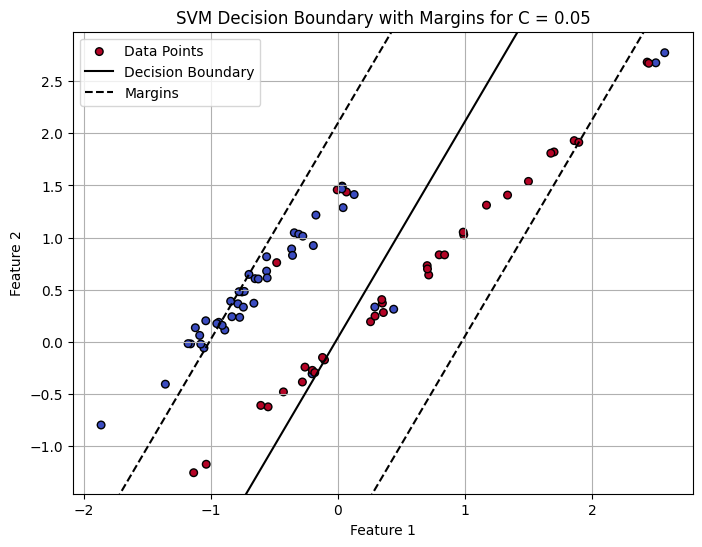

Weights: [ 1.40929809 -1.0544886 ], Bias: 0.5254999999999992
C=0.1, Accuracy: 80.00%


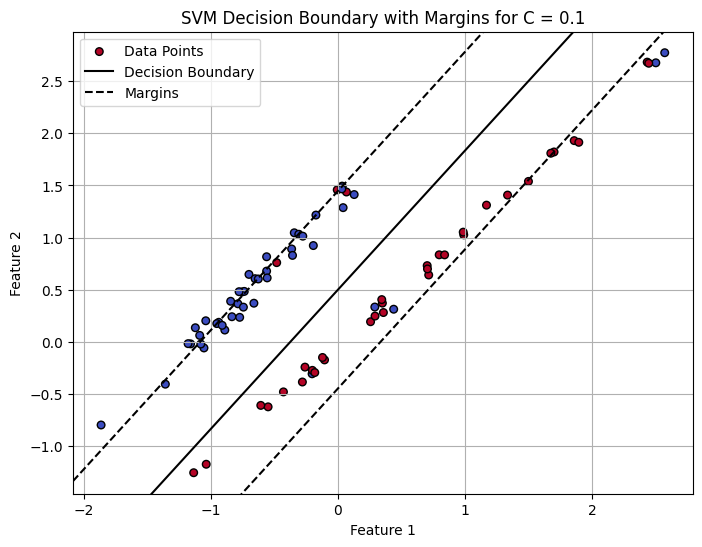

Weights: [ 1.57756155 -1.34565396], Bias: 0.7972499999999981
C=0.15000000000000002, Accuracy: 80.00%


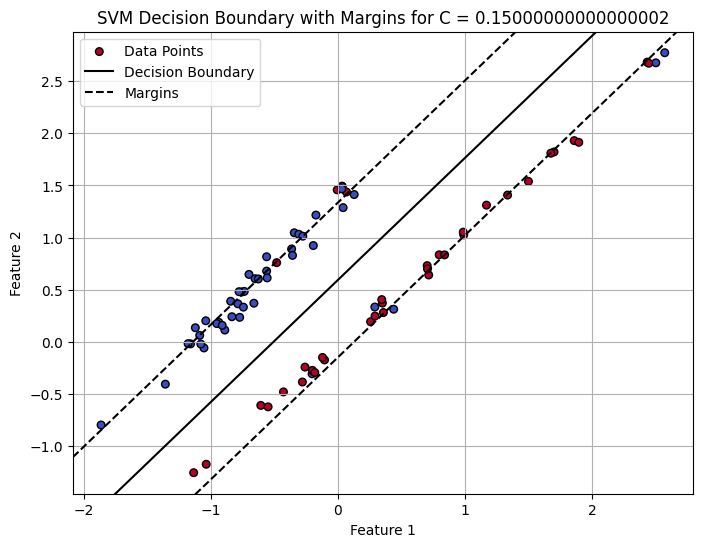

Weights: [ 1.62727224 -1.42194487], Bias: 0.8550000000000008
C=0.2, Accuracy: 80.00%


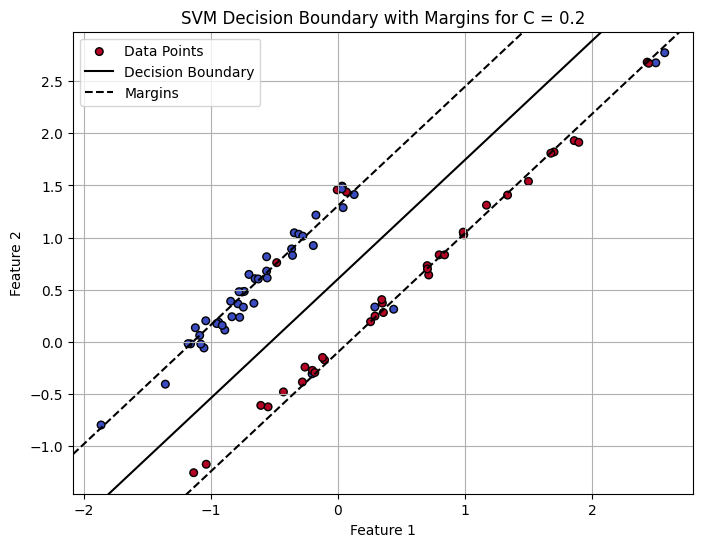

Weights: [ 1.69220282 -1.48472828], Bias: 0.8712499999999981
C=0.25, Accuracy: 80.00%


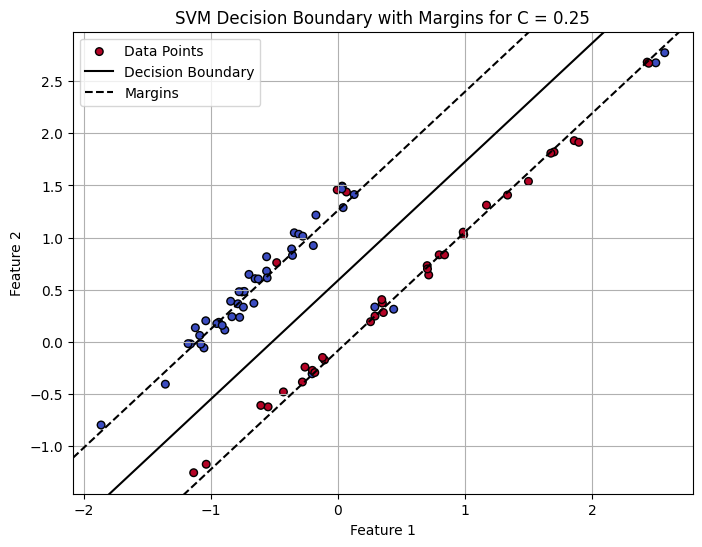

Weights: [ 1.72146485 -1.52313864], Bias: 0.896999999999987
C=0.30000000000000004, Accuracy: 80.00%


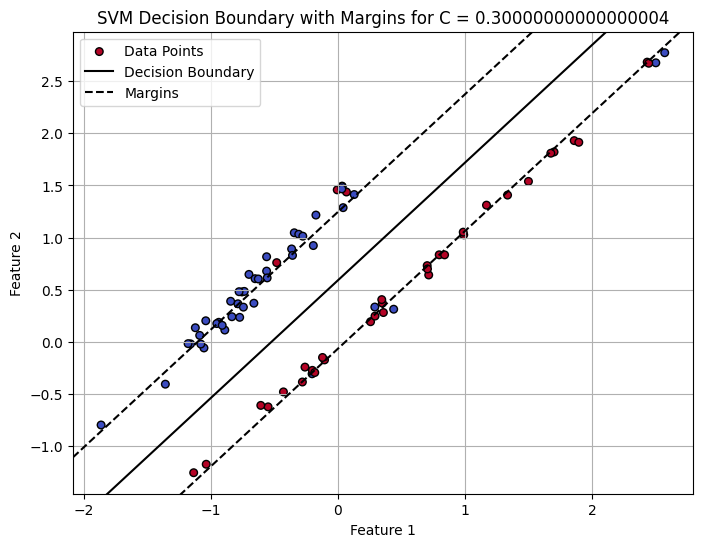

Weights: [ 1.73193749 -1.54038097], Bias: 0.9082499999999986
C=0.35000000000000003, Accuracy: 80.00%


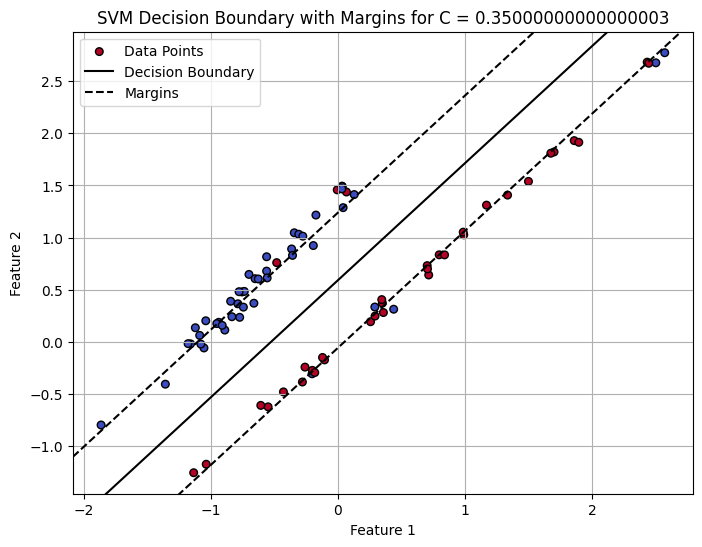

Weights: [ 1.7325529 -1.5471862], Bias: 0.9120000000000007
C=0.4, Accuracy: 80.00%


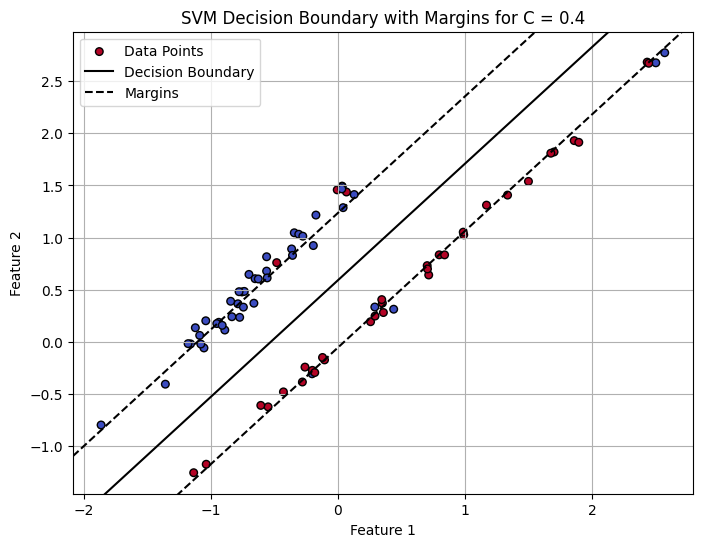

Weights: [ 1.74402572 -1.56418318], Bias: 0.9179999999999996
C=0.45, Accuracy: 80.00%


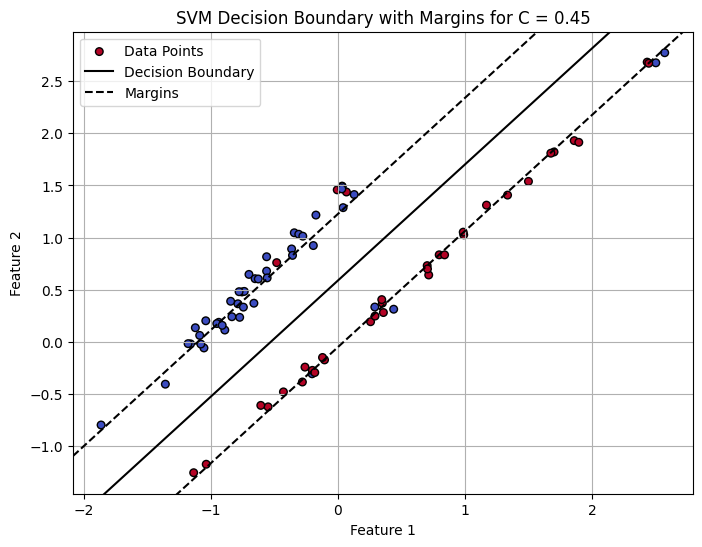

Weights: [ 1.74921687 -1.56962683], Bias: 0.9174999999999944
C=0.5, Accuracy: 80.00%


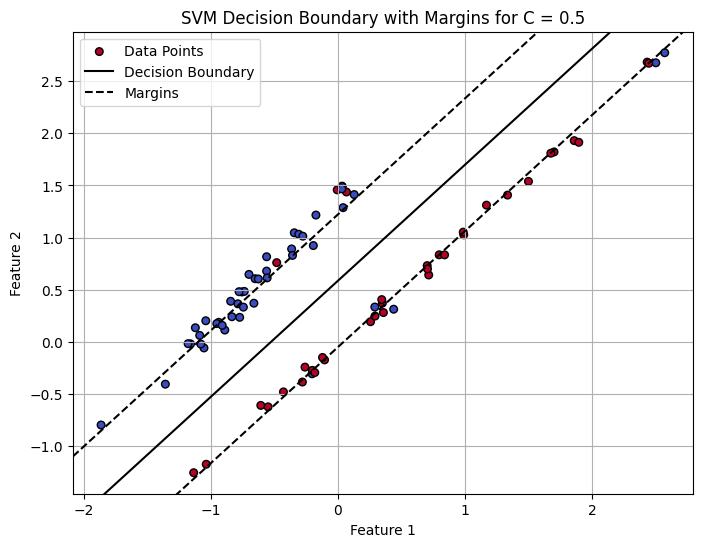

Weights: [ 1.81032318 -1.62091154], Bias: 0.9212499999999957
C=0.55, Accuracy: 80.00%


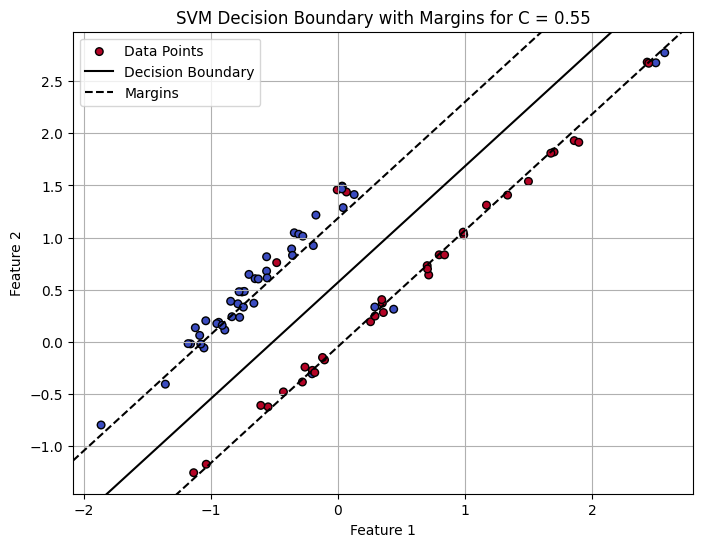

Weights: [ 1.83406329 -1.64099826], Bias: 0.9360000000000006
C=0.6000000000000001, Accuracy: 80.00%


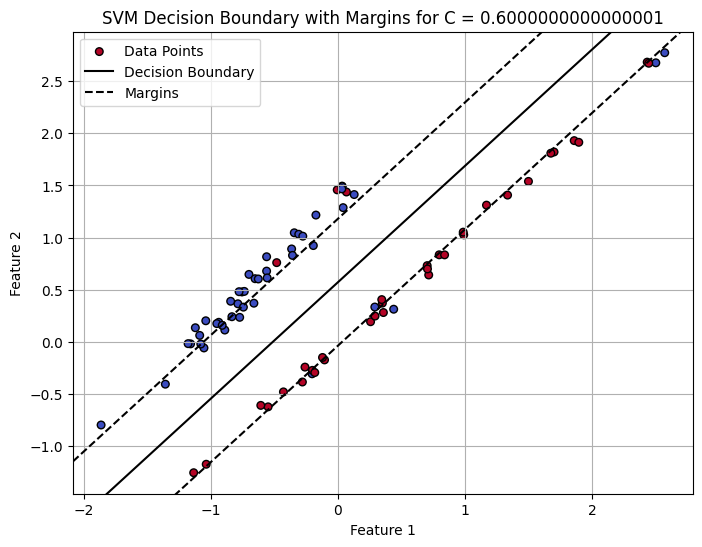

Weights: [ 1.83973139 -1.6642313 ], Bias: 0.9489999999999997
C=0.65, Accuracy: 80.00%


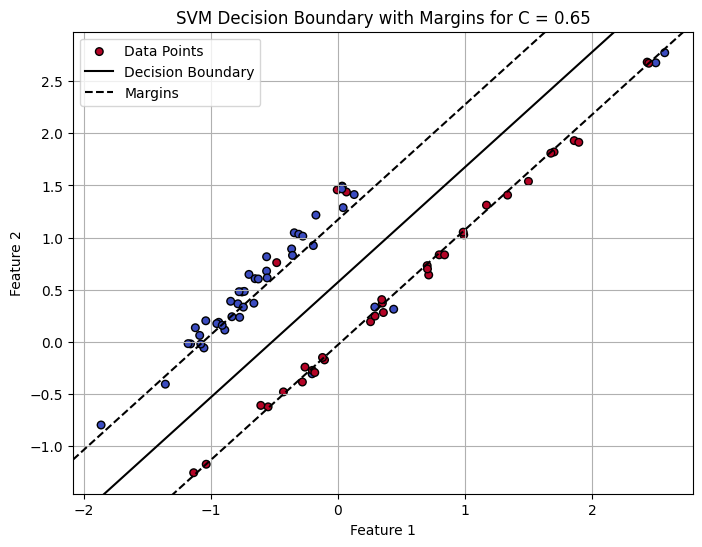

Weights: [ 1.84675965 -1.67626101], Bias: 0.9485000000000012
C=0.7000000000000001, Accuracy: 80.00%


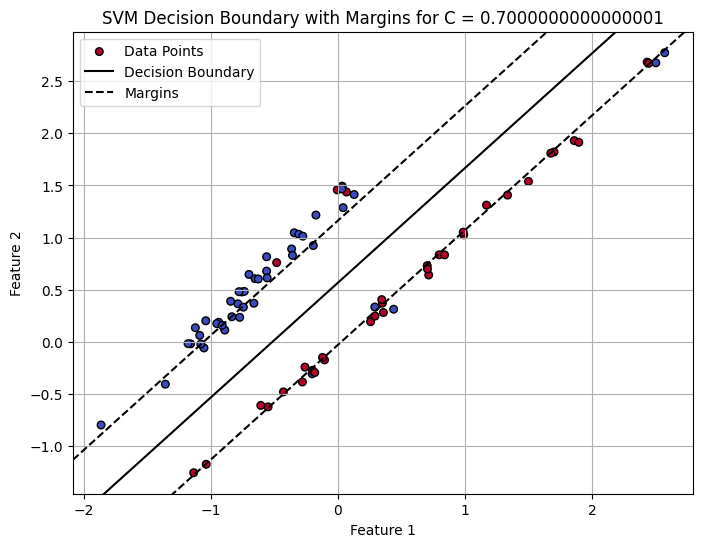

Weights: [ 1.85468275 -1.68168349], Bias: 0.9637499999999956
C=0.75, Accuracy: 80.00%


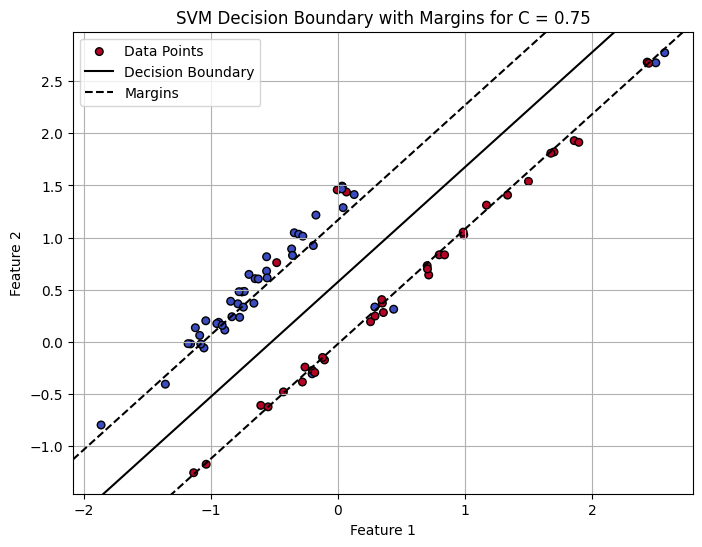

Weights: [ 1.87355977 -1.6792494 ], Bias: 0.9600000000000004
C=0.8, Accuracy: 80.00%


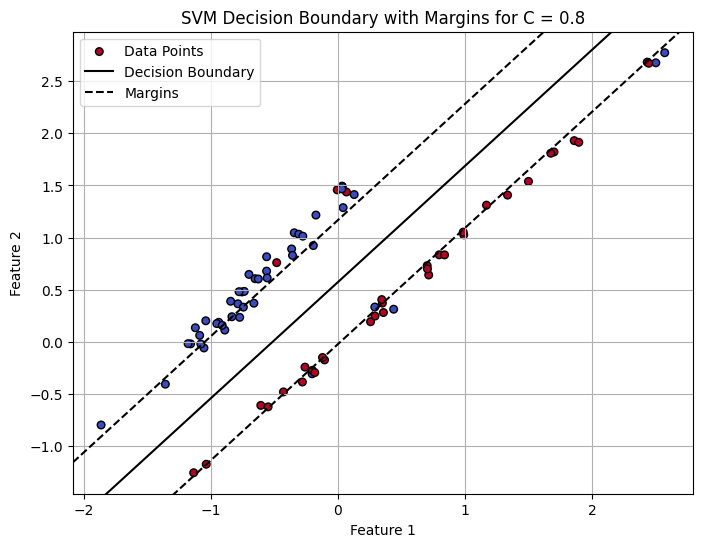

Weights: [ 1.86220497 -1.69451789], Bias: 0.9647499999999981
C=0.8500000000000001, Accuracy: 80.00%


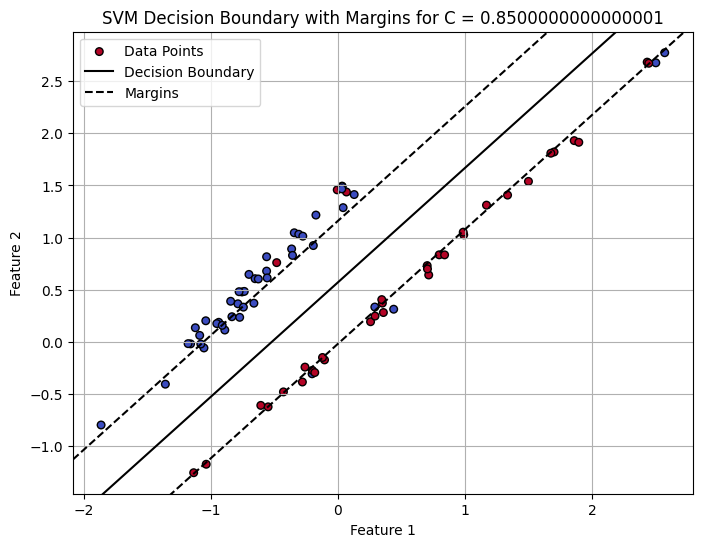

Weights: [ 1.85562176 -1.70462417], Bias: 0.962999999999991
C=0.9, Accuracy: 80.00%


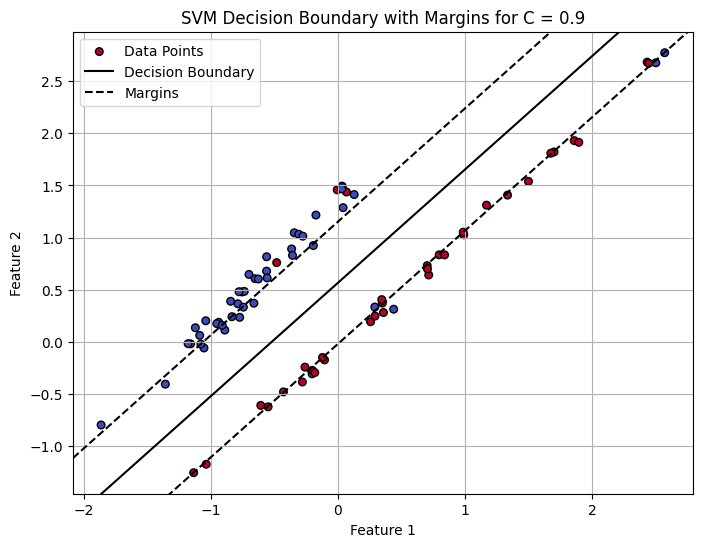

Weights: [ 1.87968822 -1.69244028], Bias: 0.9595000000000018
C=0.9500000000000001, Accuracy: 80.00%


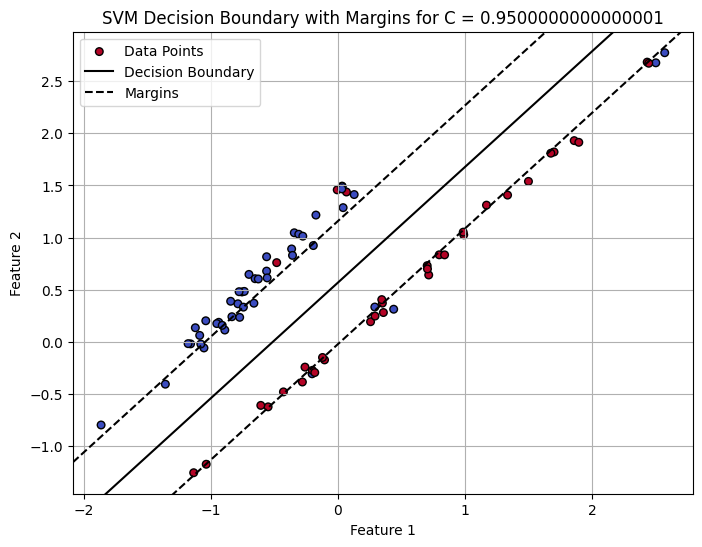

In [388]:
for c in C:
    w, b = gradient_descent_svm(X_train, y_train, c, learning_rate=0.005, max_iter=1000)
    preds = np.sign(X_test @ w + b)
    accuracy = accuracy_score(y_test, preds)
    print(f'Weights: {w}, Bias: {b}')
    print(f'C={c}, Accuracy: {accuracy * 100:.2f}%')
    plot_svm_boundary(X_train, y_train, w, b, c)